<a href="https://colab.research.google.com/github/dlsun/Stat305-S20/blob/master/colabs/notebooks/STAT_305_Notebook_7_The_Calculus_of_Maximum_Likelihood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I encourage you to work through this notebook with a partner so that you can discuss your answers. You should meet over an application such as Discord or Zoom. One person can share their screen with this notebook open.

In [25]:
!pip install -q symbulate
from symbulate import *

import matplotlib.pyplot as plt

# The Calculus of Maximum Likelihood

We have a skew die, and we want to know the probability $p$ that an ace comes up. We roll the die 45 times, and aces come up 10 times. How do we use this data to estimate $p$?

In the previous lesson, we graphed the likelihood function (for 10 aces) as a function of $p$. We found the maximum likelihood estimate by looking at the graph to get a ballpark estimate of $p$ and evaluating the likelihood at every value of $p$ at increments of $.001$.

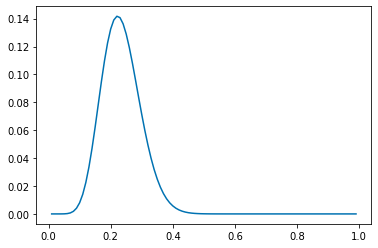

In [26]:
ps = np.arange(0.01, 1, step=.01)

# You can define the likelihood manually.
def choose(n, k):
  return factorial(n) / (factorial(k) * factorial(n - k))

def likelihood(p):
  return (choose(45, 10) * 
          p ** 10 * 
          (1 - p) ** (45 - 10))

plt.plot(ps, [likelihood(p) for p in ps], "-")

There are several problems with finding MLEs this way:

- It requires a lot of manual effort.
- At the end, we only know the MLE $\hat p$ to 3 digits of precision.

Fortunately, we can find the MLE another way. The function we want to maximize is 

$$ L_{x=10}(p) = \binom{45}{10} p^{10} (1-p)^{35}. $$

In your calculus class, you learned a way to maximize functions: take the derivative, set it equal to 0, and solve for $p$.

**Question 1.** Take the derivative of $L_{x=10}(p)$ with respect to $p$, set it equal to 0, and solve for $p$ to obtain the MLE. Verify that it agrees with the answer we obtained in the previous lesson.

(_Hint:_ Don't forget the product rule!)

_YOUR ANSWER HERE_

While that calculation probably wasn't too bad, we can make life easier by taking logarithms before taking derivatives. The graph below compares the likelihood with the log-likelihood. The two functions are very different, but they are maximized at the same value of $p$.

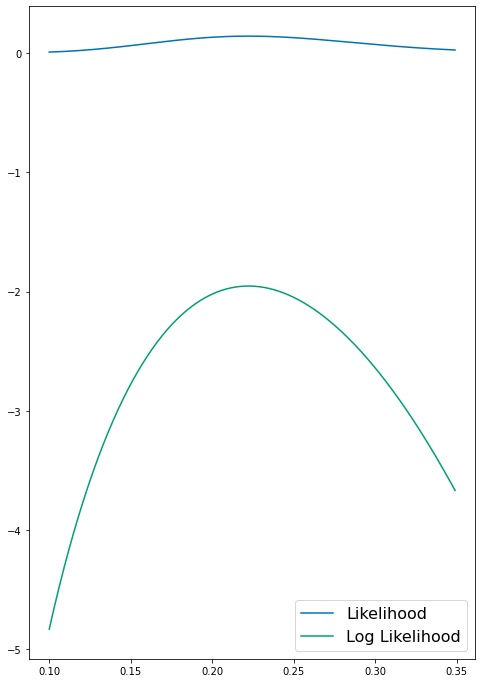

In [27]:
plt.figure(figsize=(8, 12))

ps = np.arange(0.10, 0.35, step=0.001)
plt.plot(ps, [likelihood(p) for p in ps], "-")
plt.plot(ps, [log(likelihood(p)) for p in ps], "-")
plt.legend(["Likelihood", "Log Likelihood"], fontsize=16)

Why does taking logs make our life easier? Because logarithms turn products into sums.

$$ \log(ab) = \log(a) + \log(b) $$

It is easier to take the derivative of a sum than of a product.

Another useful property of logarithms is that exponents come down:

$$ \log(b^a) = a \log(b)$$

Using these two properties, we can write and simplify the log-likelihood as

\begin{align*}
 \ell(p) = \log L_{x=10}(p) &= \log \left( \binom{45}{10} p^{10} (1 - p)^{35} \right) \\
 &= \log \binom{45}{10} + \log p^{10} + \log(1 - p)^{35} \\
 &= \log \binom{45}{10} + 10 \log p + 35 \log(1 - p). \\
\end{align*}

**Question 2.** Take the derivative of $\ell(p)$ with respect to $p$, set it equal to 0, and solve for $p$ to obtain the MLE. Verify that it agrees with the answer you obtained in Question 1.

(_Hint:_ Note that $\log$ here is the _natural_ logarithm, base $e$, sometimes written as $\ln$. We use $\log$ for the natural logarithm, rather than the base-10 logarithm, which is the standard convention in most sciences and engineering.)

_YOUR ANSWER HERE_

# The Maximum Likelihood Estimator

What would the maximum likelihood estimate have been if we had observed 14 or 6 aces, instead of 10? We could go through the entire process again for each possible value of $X$.

Here's a better idea. What if we left $X$ in the likelihood? Then, when we solve for the maximum likelihood estimate, we will get the MLE as a function of $X$. That is, we will know what the estimate is, for any outcome we might observe.

The log-likelihood is:

\begin{align*}
 \ell(p) = \log L(p) &= \log \left( \binom{45}{X} p^{X} (1 - p)^{45-X} \right) \\
 &= \log \binom{45}{X} + \log p^{X} + \log(1 - p)^{45-X} \\
 &= \log \binom{45}{X} + X \log p + (45 - X) \log(1 - p). \\
\end{align*}

**Question 3.** Calculate the maximum likelihood estimator $\hat p$ as a function of the data $X$. 

(_Hint:_ Remember that you are maximizing with respect to $p$, so you should take the derivative with respect to $p$. As far as maximum likelihood is concerned, $X$ is just a constant.)

_YOUR ANSWER HERE_

## General Theory

To calculate the maximum likelihood estimator $\hat\theta$, 

1. Write the likelihood in terms of the parameter $\theta$ and the data $X$.
2. Take logarithms and simplify.
3. Set the derivative of the log-likelihood (with respect to $\theta$) equal to 0, and solve for $\theta$.

This recipe only works when the parameter $\theta$ is continuous. It does not work for Example 5, where the parameter $N$ is an integer.

# Example 4 Revisited



A team of 30 people consists of both agents and spies. Agents have a $2/3$ chance of succeeding on their mission; spies only have a $1/3$ chance of succeeding. The proportion of spies $s$ is unknown. Each of the 30 team members independently goes out on a mission, and 19 of the missions are successful. Based on this data, what is your estimate $\hat s$ of the proportion of spies?

**Question 4.** In the previous lesson, you calculated the maximum likelihood estimate when there were 19 successful missions. Now, calculate the maximum likelihood estimator $\hat s$ in terms of the number of successful missions $X$.

_YOUR ANSWER HERE_

# Example 2 Revisited



Recall Example 2, where we wanted to estimate the rate parameter $\lambda$ of a Poisson process by which radioactive particles reach a Geiger counter.

We recorded the number of particles in 1-second intervals for 10 seconds:
$$ 0, 3, 1, 0, 0, 1, 0, 2, 0, 4. $$

**Question 5.** Write down the likelihood for observing these 10 observations, as a function of $\lambda$.

The likelihood in this case can be calculated from the joint p.m.f. Remember that the 10 observations are independent.

_YOUR ANSWER HERE_

\begin{align}
L(\lambda) &= f_{\lambda}(0, 3, 1, 0, 0, 1, 0, 2, 0, 4) \\
&= ...
\end{align}

**Question 6.** What do you notice about the values of the likelihood $L$? Graph the log-likelihood $\ell$.

_YOUR ANSWER HERE_

In [ ]:
# YOUR CODE HERE

**Question 7.** Now, suppose we record the number of particles in 1-second intervals for $n$ seconds, and we observe $X_1, X_2, ..., X_n$. Generalize your calculation above to obtain the maximum likelihood estimator of $\lambda$ in terms of $X_1, X_2, ..., X_n$.



_YOUR ANSWER HERE_

# Submission Instructions

1. [Go here](https://canvas.calpoly.edu/courses/25458/groups), and add you and your partner (if applicable) to one of the STAT 305 Groups.
2. Export this Colab notebook to PDF. Easiest way is File > Print > Save as PDF.
3. Double check that the PDF rendered properly (i.e., nothing is cut off).
4. Upload the PDF [to Canvas](https://canvas.calpoly.edu/courses/25458/assignments/111116). Only one of you needs to upload the PDF.